# ML Capstone 1 - Part 3 E-Commerce Customer Segmentation

## TODO
 
### Clustering Algorithms for Customer Segmentation
- Applying unsupervised learning algorithms (e.g., K-means clustering, Hierarchical clustering) to segment customers
- Determining the optimal number of clusters using techniques such as the elbow method or silhouette score
- Interpreting customer segments based on cluster characteristics and feature importance
- Visualize the clusters using PCA

### Classification for Segment Prediction (8 pts)
- Using any of the supervised learning classification algorithms (e.g., Random Forest, Gradient Boosting, Logistic Regression) predict customer segments:

    - Split the dataset into training, validation and test sets
    - Training classification models to predict the segment to which a customer belongs
    - Validating the classification model's performance and generalization using cross-validation techniques
    - Evaluating model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score)
    - Iteratively refining segmentation and classification strategies based on validation results and stakeholder feedback


### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset 
df = pd.read_csv("ecommerce_data.csv", encoding="latin1")

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Display the first five rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

In [11]:
# Display the dimensions of the dataset
df.shape

(536641, 8)

In [13]:
# Check for missing values in the dataset
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [15]:
# Fill missing values
df["Description"] = df["Description"].fillna("Unknown")
df['CustomerID'].fillna(-1, inplace=True)

/var/folders/dh/p64714d11c57r2q6xgcmm97h0000gn/T/ipykernel_2000/17667984.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(-1, inplace=True)


In [17]:
# Convert the 'InvoiceDate' column to a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [19]:
# Calculate the difference in days since the last purchase for each customer
df = df.sort_values(by=["CustomerID", "InvoiceDate"])

df["Days_since_last_purchase"] = df.groupby("CustomerID")["InvoiceDate"].diff().dt.days
df["Days_since_last_purchase"].fillna(0, inplace=True)

/var/folders/dh/p64714d11c57r2q6xgcmm97h0000gn/T/ipykernel_2000/4115824020.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Days_since_last_purchase"].fillna(0, inplace=True)


In [21]:
# Calculate the purchase frequency and monetary value for each customer
df['purchase_frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df['monetary_value'] = df.groupby('CustomerID')['UnitPrice'].transform('sum')

In [23]:
# Calculate the number of distinct products purchased by each customer
df['distinct_products_purchased'] = df.groupby('CustomerID')['StockCode'].transform('nunique')

In [25]:
# Display basic information after performing transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 622 to 423941
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   InvoiceNo                    536641 non-null  object        
 1   StockCode                    536641 non-null  object        
 2   Description                  536641 non-null  object        
 3   Quantity                     536641 non-null  int64         
 4   InvoiceDate                  536641 non-null  datetime64[ns]
 5   UnitPrice                    536641 non-null  float64       
 6   CustomerID                   536641 non-null  float64       
 7   Country                      536641 non-null  object        
 8   Days_since_last_purchase     536641 non-null  float64       
 9   purchase_frequency           536641 non-null  int64         
 10  monetary_value               536641 non-null  float64       
 11  distinct_products_purchased  

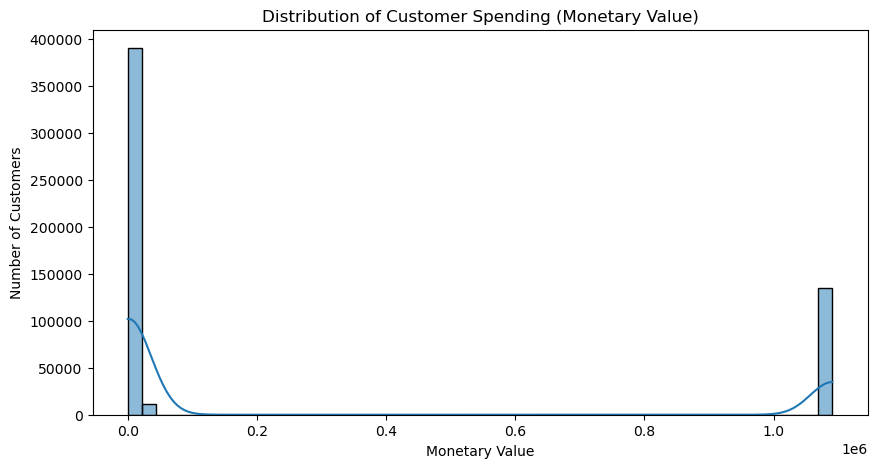

In [27]:
# Plot the distribution of customer spending
plt.figure(figsize=(10, 5))
sns.histplot(df['monetary_value'], bins=50, kde=True)
plt.title("Distribution of Customer Spending (Monetary Value)")
plt.xlabel("Monetary Value")
plt.ylabel("Number of Customers")
plt.show()

In [28]:
print("Count of maximum value:", (df['monetary_value'] == df['monetary_value'].max()).sum())

Count of maximum value: 135037


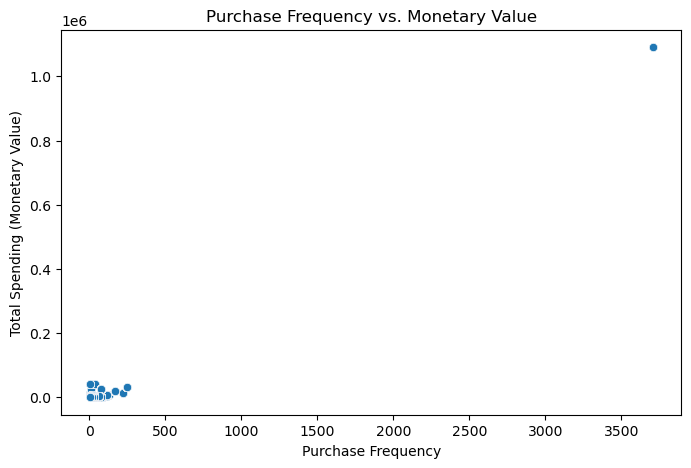

In [29]:
# Create a scatter plot to show the relationship between purchase frequency and monetary value
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['purchase_frequency'], y=df['monetary_value'])
plt.title("Purchase Frequency vs. Monetary Value")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending (Monetary Value)")
plt.show()

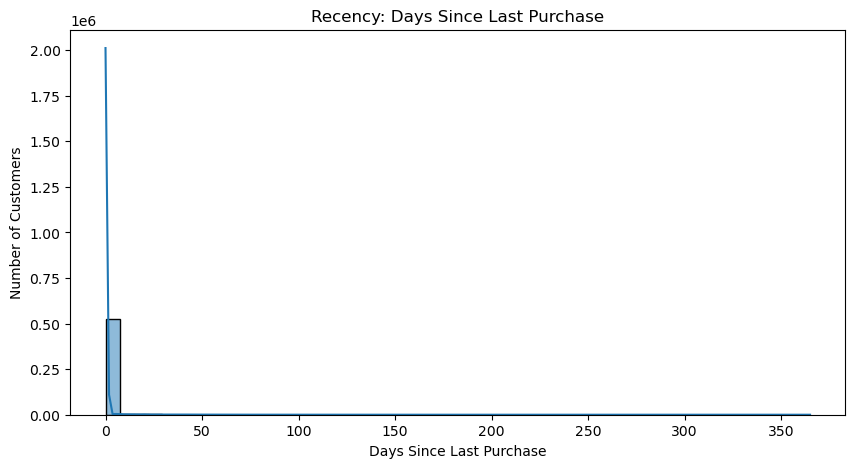

In [33]:
# Plotting the distribution of days since the last purchase to analyze customer recency
plt.figure(figsize=(10, 5))
sns.histplot(df['Days_since_last_purchase'], bins=50, kde=True)
plt.title("Recency: Days Since Last Purchase")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")
plt.show()

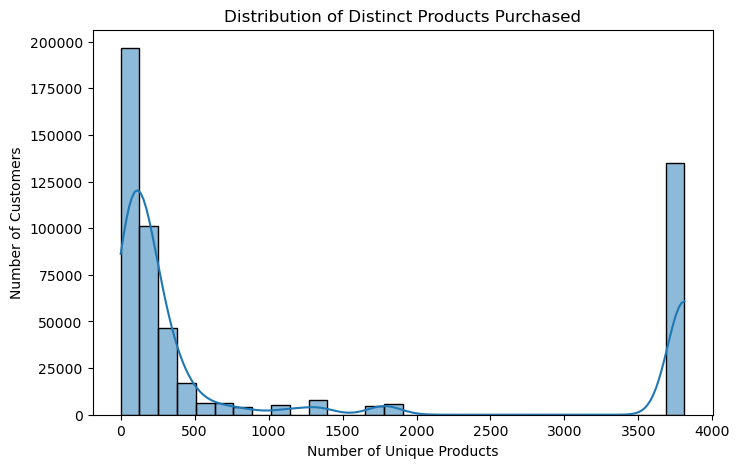

In [34]:
# Plotting the distribution of distinct products purchased by customers
plt.figure(figsize=(8, 5))
sns.histplot(df['distinct_products_purchased'], bins=30, kde=True)
plt.title("Distribution of Distinct Products Purchased")
plt.xlabel("Number of Unique Products")
plt.ylabel("Number of Customers")
plt.show()

/var/folders/dh/p64714d11c57r2q6xgcmm97h0000gn/T/ipykernel_2000/4243809653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Month'].astype(str), palette='coolwarm')


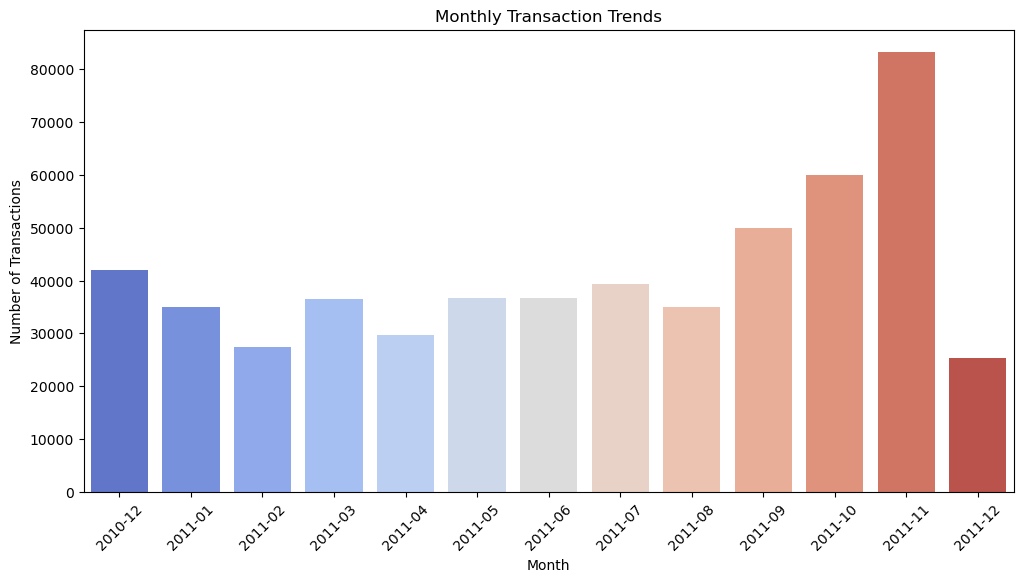

In [36]:
# Counting the number of transactions per month
df['Month'] = df['InvoiceDate'].dt.to_period('M')

plt.figure(figsize=(12, 6))
sns.countplot(x=df['Month'].astype(str), palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

/var/folders/dh/p64714d11c57r2q6xgcmm97h0000gn/T/ipykernel_2000/1057253162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


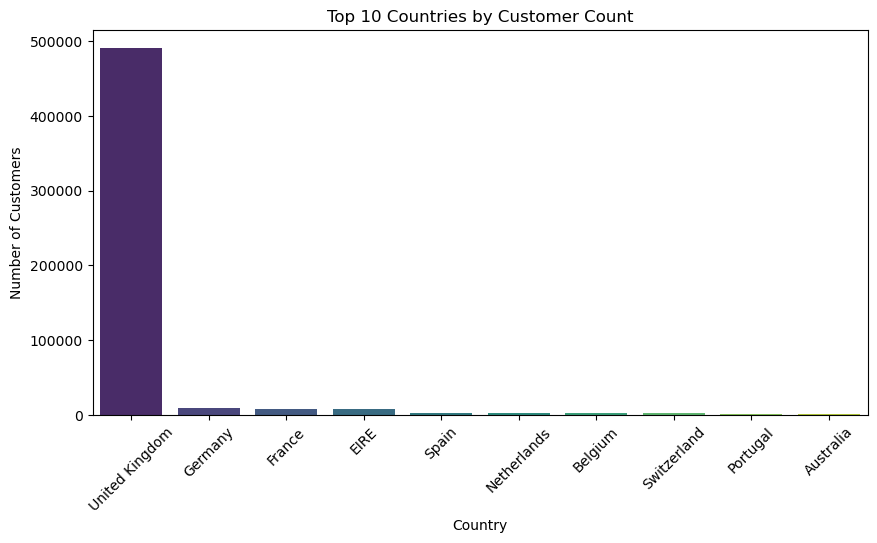

In [38]:
# Identifying and visualizing the top 10 countries by customer count
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title("Top 10 Countries by Customer Count")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.show()

In [39]:
# Encoding categorical columns using LabelEncoder for numerical representation
df['InvoiceNo_Encoded'] = LabelEncoder().fit_transform(df['InvoiceNo'])
df['StockCode'] = LabelEncoder().fit_transform(df['StockCode'])
df['Country'] = LabelEncoder().fit_transform(df['Country'])
df['Description'] = LabelEncoder().fit_transform(df['Description'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Days_since_last_purchase,purchase_frequency,monetary_value,distinct_products_purchased,Month,InvoiceNo_Encoded
622,536414,1094,3740,56,2010-12-01 11:52:00,0.00,-1.0,36,0.0,3710,1090875.12,3810,2010-12,43
1443,536544,826,1000,1,2010-12-01 14:32:00,2.51,-1.0,36,0.0,3710,1090875.12,3810,2010-12,84
1444,536544,827,996,2,2010-12-01 14:32:00,2.51,-1.0,36,0.0,3710,1090875.12,3810,2010-12,84
1445,536544,833,2729,4,2010-12-01 14:32:00,0.85,-1.0,36,0.0,3710,1090875.12,3810,2010-12,84
1446,536544,834,2805,2,2010-12-01 14:32:00,1.66,-1.0,36,0.0,3710,1090875.12,3810,2010-12,84


In [43]:
df = df.drop(columns=['InvoiceNo','Month'])

In [45]:
# Displaying a summary of the DataFrame after encoding the categorical varaibles
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 622 to 423941
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   StockCode                    536641 non-null  int64         
 1   Description                  536641 non-null  int64         
 2   Quantity                     536641 non-null  int64         
 3   InvoiceDate                  536641 non-null  datetime64[ns]
 4   UnitPrice                    536641 non-null  float64       
 5   CustomerID                   536641 non-null  float64       
 6   Country                      536641 non-null  int64         
 7   Days_since_last_purchase     536641 non-null  float64       
 8   purchase_frequency           536641 non-null  int64         
 9   monetary_value               536641 non-null  float64       
 10  distinct_products_purchased  536641 non-null  int64         
 11  InvoiceNo_Encoded            

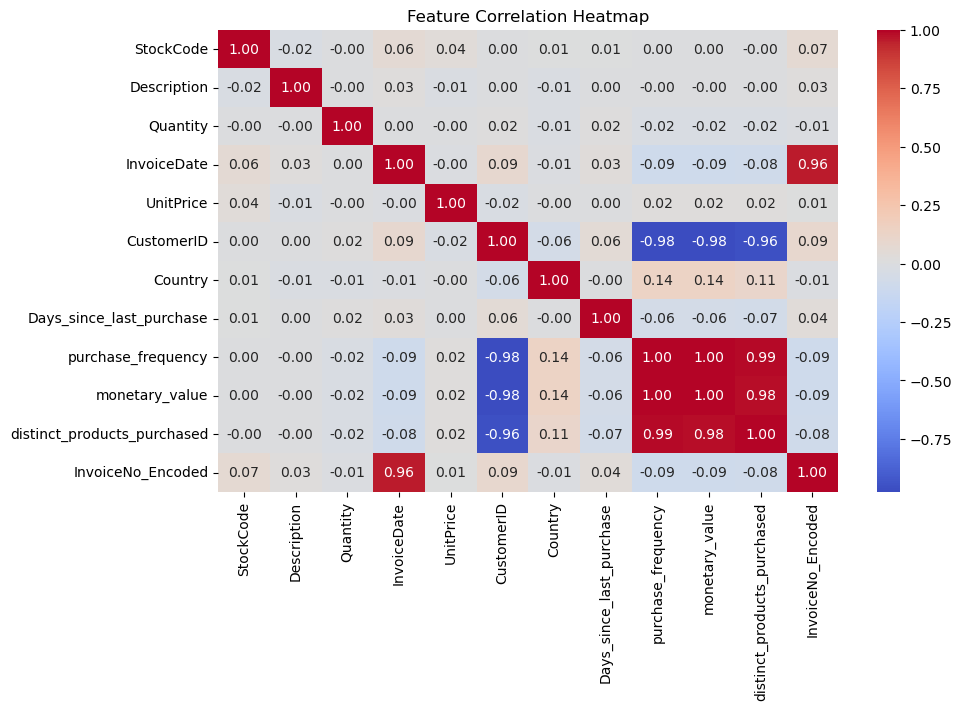

In [47]:
# Plotting a heatmap to visualize the correlation between features in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [49]:
# Calculate the correlation matrix
corr_matrix = df.corr()

In [51]:
# Identify and print the highly correlated feature pairs
threshold = 0.8 
high_corr_pairs = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.add((col1, col2))

print("Highly Correlated Features:")
for pair in high_corr_pairs:
    print(pair)

Highly Correlated Features:
('distinct_products_purchased', 'purchase_frequency')
('InvoiceNo_Encoded', 'InvoiceDate')
('distinct_products_purchased', 'monetary_value')
('monetary_value', 'purchase_frequency')
('monetary_value', 'CustomerID')
('purchase_frequency', 'CustomerID')
('distinct_products_purchased', 'CustomerID')


In [53]:
# Handle the date column
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day

In [55]:
# Drop highly correlated and irrelevant features
df = df.drop(columns=['InvoiceNo_Encoded', 'monetary_value', 'distinct_products_purchased', 'InvoiceDate'])

In [57]:
# Standardize the features
scaler = StandardScaler()
features = df.columns
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = features)

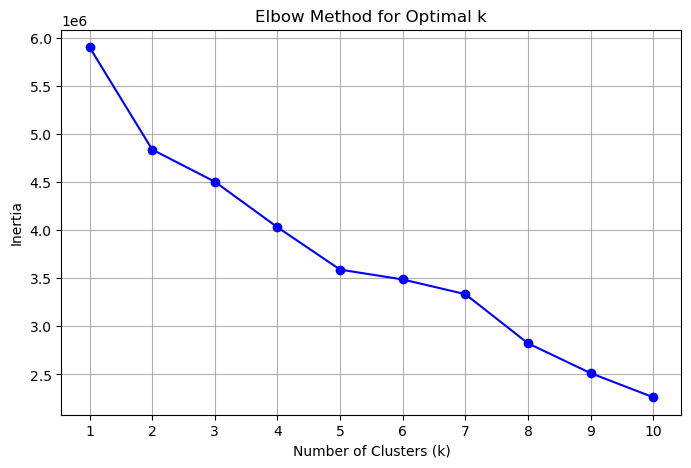

In [59]:
# Fit KMeans on the scaled dataset
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

In [60]:
# Apply KMeans with k = 4 
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

In [61]:
# Add cluster labels to the dataframe for analysis
df_clustered = df.copy()
df_clustered['Cluster'] = df_scaled['Cluster']

# Calculate the average values per cluster
cluster_summary = df_clustered.groupby('Cluster').mean()
cluster_summary

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Days_since_last_purchase,purchase_frequency,year,month,day
Cluster,,,,,,,,,,,
0.0,1673.484452,2154.900680,9.891424,4.525806,11725.123500,34.152754,1.268420,882.106798,2011.000000,8.096852,15.700914
1.0,1629.780122,2098.725894,8.729053,5.145673,11531.542015,34.590553,0.872881,959.774697,2010.629470,9.873605,11.345912
2.0,1584.506350,2082.972160,9.147501,5.107488,10342.786567,34.290131,0.457923,1208.040853,2010.775269,4.201273,14.919764
3.0,1672.879422,2157.571202,9.891552,4.317629,11894.686990,34.224487,1.322000,837.171039,2011.000000,8.484644,15.421507


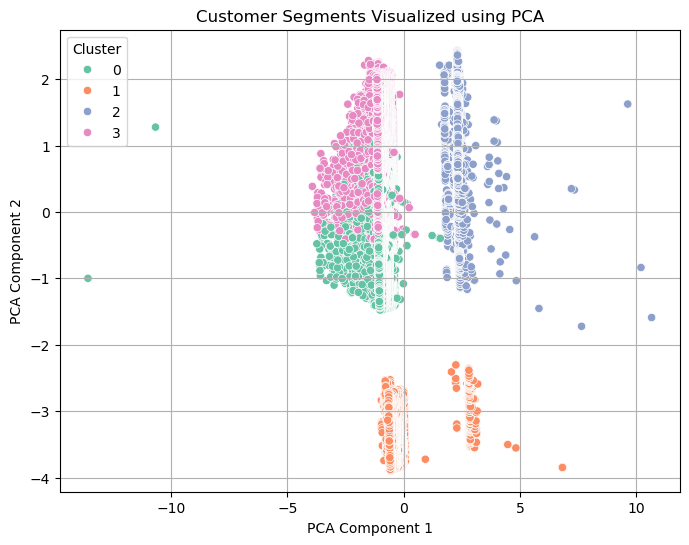

In [62]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled.drop(columns='Cluster'))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_scaled['Cluster'], palette='Set2')
plt.title('Customer Segments Visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [63]:
# Merge cluster labels with original (unscaled) data for meaningful interpretation
df_original = df.copy()
df_original['Cluster'] = df_scaled['Cluster']

# Compute aggregate stats for each cluster
cluster_summary = df_original.groupby('Cluster').agg({
    'purchase_frequency': 'mean',
    'Days_since_last_purchase': 'mean',
    'UnitPrice': 'mean',
    'Quantity': 'mean',
    'CustomerID': 'nunique'
}).rename(columns={
    'purchase_frequency': 'Avg_Purchase_Frequency',
    'Days_since_last_purchase': 'Avg_Recency_Days',
    'UnitPrice': 'Avg_UnitPrice',
    'Quantity': 'Avg_Quantity',
    'CustomerID': 'Num_Customers'
})

cluster_summary.round(2)


,Avg_Purchase_Frequency,Avg_Recency_Days,Avg_UnitPrice,Avg_Quantity,Num_Customers
Cluster,,,,,
0.0,882.11,1.27,4.53,9.89,3229
1.0,959.77,0.87,5.15,8.73,1445
2.0,1208.04,0.46,5.11,9.15,1979
3.0,837.17,1.32,4.32,9.89,3240


In [64]:
# Split the data into training and testing sets with stratification on the target
features_to_drop = ['CustomerID', 'Description', 'Cluster']  
X = df_scaled.drop(columns=features_to_drop, errors='ignore') 
y = df_scaled['Cluster']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38071
           1       1.00      1.00      1.00      8396
           2       1.00      1.00      1.00     23882
           3       1.00      1.00      1.00     36980

    accuracy                           1.00    107329
   macro avg       1.00      1.00      1.00    107329
weighted avg       1.00      1.00      1.00    107329



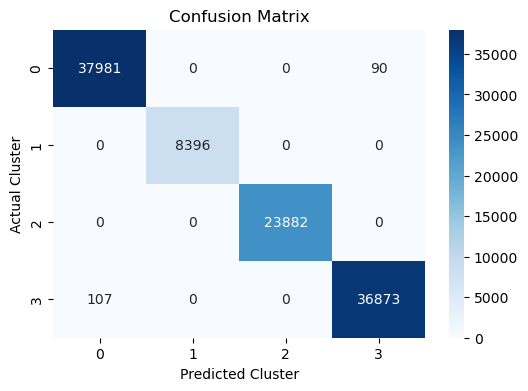

In [65]:
# Plot the confusion matrix 
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Cluster")
plt.show()

In [66]:
 # Perform 5-fold cross-validation using weighted F1 score
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='f1_weighted')
print(f"\nAverage Cross-Validated F1 Score: {cv_scores.mean():.4f}")


Average Cross-Validated F1 Score: 0.9941


##### The customer segmentation analysis using K-means clustering found four clear groups of shoppers, each with their own distinct shopping styles. These groups stood out based on how often they shop, how recently they made a purchase, the prices of items they go for, and how much they buy — showing a nice variety in customer behavior.

##### The average F1-score of 0.9941 indicates that the classification model is highly accurate at figuring out who belongs to which group just by looking at their shopping habits.

##### Here’s a breakdown of each group:

#### Cluster 0: 
##### These are the steady shoppers. They buy pretty regularly, not too flashy with prices, and grab a decent number of items. You can keep them engaged with personalized promos or recommendations. They seem practical and value-conscious.

#### Cluster 1: 
##### Big spenders who shop often and recently, but don’t grab a ton of items. Think premium buyers. We might want to offer them exclusive deals, early access to products, or high-end bundles.

#### Cluster 2: 
##### These are the MVPs — super active, shop often, and spend a lot. They’re probably your most loyal folks. We can treat them like VIPs with loyalty rewards, referral perks, and sneak peeks at new stuff.

#### Cluster 3: 
##### Similar to Cluster 0 in how often and how recently they shop, but they go for cheaper items. Might be more budget-conscious or starting to lose interest. We can try winning them back with discounts, reminder emails, or affordable product bundles.